# Precipitation and vertical velocity

First let's import necessary modules: <br>
Cartopy is a Python package designed for geospatial data processing in order to produce maps and other geospatial data analyses. For more information on cartopy can be found here: <br>
  >  https://scitools.org.uk/cartopy/docs/latest/

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd

## Plotting surface pressure.
Open and read a netCDF file.

We will use ncep realanysis2 long term mean data. Please find the data on the web and click the "*.nc" file. You can find the information on the next page. Choose OpenDAP and copy the data link.

#### Data catalog from NOAA
https://psl.noaa.gov/thredds/catalog/catalog.html

In [2]:
file_loc="http://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis2.derived/LTMs/surface/"
filename1="mslp.mon.ltm.nc"

with xr.open_dataset(file_loc+filename1) as ds1:      
    print(ds1)

<xarray.Dataset>
Dimensions:             (lat: 73, lon: 144, time: 12, nbnds: 2)
Coordinates:
  * lat                 (lat) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * time                (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:0...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] ...
    mslp                (time, lat, lon) float32 ...
    valid_yr_count      (time, lat, lon) float32 ...
Attributes:
    Conventions:                    CF-1.0
    title:                          Monthly NCEP/DOE Reanalysis 2
    comments:                       Data is from \nNCEP/DOE AMIP-II Reanalysi...
    platform:                       Model
    source:                         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2...
    institution:                    National Centers for Environmental Predic...
    dataset_title:                  NCEP-DOE A

/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


In [3]:
# Let's check mean surface pressure and assign it as ps.
mslp=ds1.mslp/100.  # in hPa
mslp

<xarray.DataArray 'mslp' (time: 12, lat: 73, lon: 144)>
array([[[1012.75104, 1012.75104, 1012.75104, ..., 1012.75104,
         1012.75104, 1012.75104],
        [1011.10266, 1011.1007 , 1011.0987 , ..., 1011.13104,
         1011.12134, 1011.1103 ],
        [1009.83734, 1009.7743 , 1009.719  , ..., 1010.0507 ,
         1009.9763 , 1009.90466],
        ...,
        [1002.8727 , 1003.3107 , 1003.72534, ..., 1001.4597 ,
         1001.944  , 1002.4166 ],
        [1005.1747 , 1005.38336, 1005.584  , ..., 1004.51794,
         1004.74133, 1004.9593 ],
        [1002.5957 , 1002.5957 , 1002.5957 , ..., 1002.5957 ,
         1002.5957 , 1002.5957 ]],

       [[1013.6157 , 1013.6157 , 1013.6157 , ..., 1013.6157 ,
         1013.6157 , 1013.6157 ],
        [1012.13837, 1012.127  , 1012.1193 , ..., 1012.1847 ,
         1012.1657 , 1012.151  ],
        [1011.09534, 1011.01794, 1010.9473 , ..., 1011.3513 ,
         1011.26294, 1011.1793 ],
...
        [1007.1867 , 1007.93115, 1008.6365 , ..., 1004.7978 ,
         1005.6166 , 1006.4151 ],
        [1009.88116, 1010.2325 , 1010.56866, ..., 1008.77625,
         1009.1546 , 1009.52155],
        [1005.1354 , 1005.1354 , 1005.1354 , ..., 1005.1354 ,
         1005.1354 , 1005.1354 ]],

       [[1012.7943 , 1012.7943 , 1012.7943 , ..., 1012.7943 ,
         1012.7943 , 1012.7943 ],
        [1011.29877, 1011.274  , 1011.2514 , ..., 1011.38947,
         1011.35736, 1011.32764],
        [1010.201  , 1010.0927 , 1009.9905 , ..., 1010.54974,
         1010.42975, 1010.31305],
        ...,
        [1001.0984 , 1001.4998 , 1001.88367, ...,  999.8024 ,
         1000.24744, 1000.6782 ],
        [1003.4727 , 1003.67206, 1003.86194, ..., 1002.84   ,
         1003.0572 , 1003.26807],
        [1000.69226, 1000.69226, 1000.69226, ..., 1000.69226,
         1000.69226, 1000.69226]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00

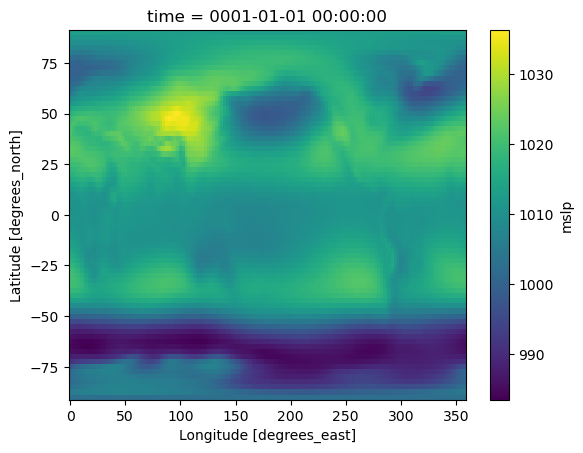

In [4]:
# select January and 500 hPa and plot.
mslp.isel(time=0).plot()  # sel is used to specify values.

Text(0.5, 1.0, 'January mean sea level pressure (hPa)')

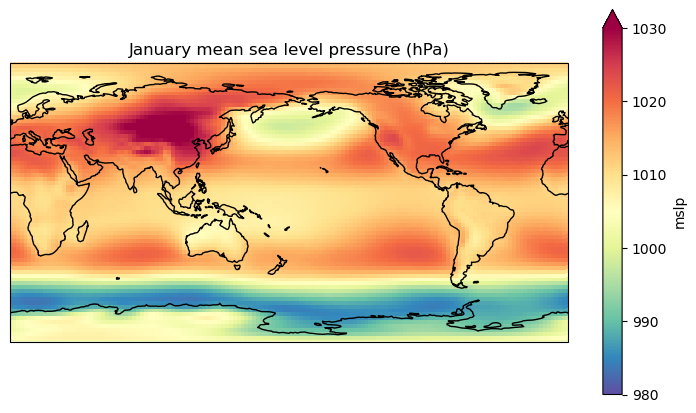

In [5]:
# Make a prettier plot.
cmap1=plt.cm.Spectral_r
proj = ccrs.PlateCarree()
fig1 = plt.figure(figsize=(9,5))
ax1 = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cs1=mslp.isel(time=0).plot.pcolormesh(ax=ax1, transform=proj, cmap=cmap1, vmax=1030, vmin=980)
ax1.coastlines()
plt.title('January mean sea level pressure (hPa)')

#### Exercise
Plot July sea level pressure.

### Adding wind vectors.

First, let's read wind vectors.

In [6]:
file_loc2="http://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis2.derived/LTMs/gaussian_grid/"
filename2="uwnd.10m.mon.ltm.nc"
filename3="vwnd.10m.mon.ltm.nc"
with xr.open_dataset(file_loc2+filename2) as ds2:      
    print(ds2)
with xr.open_dataset(file_loc2+filename3) as ds3:      
    print(ds3)

/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<xarray.Dataset>
Dimensions:             (level: 1, lat: 94, lon: 192, time: 12, nbnds: 2)
Coordinates:
  * level               (level) float32 10.0
  * lat                 (lat) float32 88.54 86.65 84.75 ... -84.75 -86.65 -88.54
  * lon                 (lon) float32 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
  * time                (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:0...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] ...
    uwnd                (time, level, lat, lon) float32 ...
    valid_yr_count      (time, level, lat, lon) float32 ...
Attributes:
    Conventions:                    CF-1.0
    title:                          Monthly NCEP/DOE Reanalysis 2
    comments:                       Data is from \nNCEP/DOE AMIP-II Reanalysi...
    platform:                       Model
    source:                         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2...
    institution:                    National Centers

/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


In [7]:
# Assign 10m wind as u10 and v10
print(ds2.uwnd) #note that wnd is a 4D variable

<xarray.DataArray 'uwnd' (time: 12, level: 1, lat: 94, lon: 192)>
[216576 values with dtype=float32]
Coordinates:
  * level    (level) float32 10.0
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
Attributes: (12/14)
    long_name:      Long Term Mean Monthly Mean of Forecast of U-wind at 10 m
    units:          m/s
    precision:      2
    GRIB_id:        33
    GRIB_name:      U GRD
    var_desc:       u-wind
    ...             ...
    statistic:      Long Term Mean
    parent_stat:    Individual Obs
    standard_name:  eastward_wind
    cell_methods:   time: mean (monthly of 6-hourly values)
    valid_range:    [-120.  120.]
    actual_range:   [-14.914674  12.115331]


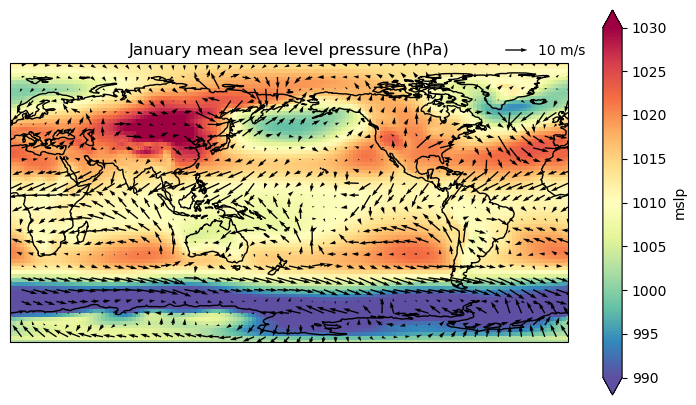

In [9]:
# First let's plot January mean sea level pressure.

cmap1=plt.cm.Spectral_r
fig1 = plt.figure(figsize=(9,5))
ax1 = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cs1=mslp.isel(time=0).plot.pcolormesh(ax=ax1, transform=ccrs.PlateCarree(), cmap=cmap1, vmax=1030, vmin=990)
ax1.coastlines()
plt.title('January mean sea level pressure (hPa)')

# and add wind vectors
q1=ax1.quiver(ds2.lon[::4], ds2.lat[::4], ds2.uwnd[0,0,::4,::4],ds3.vwnd[0,0,::4,::4]) # (lon,lat,u,v) 
# arrows at every 4th points

plt.quiverkey(q1, 0.70, 0.8, 10, '10 m/s', labelpos='E',
                   coordinates='figure') # (Q,X,Y,U,label)

### Exercise

Make a plot of July mean sea level pressure and wind vector.

#### Homework
Explain major patterns of precipitation and vertical velocity in January and July. Link it with the precipitation or vertical distribution.